# A simple implementation of multi-output architecture, using UIUC 

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Layer

In [26]:
def format_output(data):
  y1 = np.array(data.pop('Y1'))
  y2 = np.array(data.pop('Y2'))
  return y1, y2

def norm(x):
  return np.asarray((x - train_stats['mean']) / train_stats['std'])

def plot_diff(y_true, y_pred, title=''):
  plt.scatter(y_true, y_pred)
  plt.title(title)
  plt.xlabel('True values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100, 100], [-100, 100])
  plt.show()

def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0, ylim)
  plt.plot(history.history[metric_name], color='blue', label=metric_name)
  plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
  plt.show()

In [27]:
URI = 'data/energy_efficiency.csv'
df = pd.read_csv(URI)
df = df.sample(frac=1).reset_index(drop=True)

train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

train_stats.pop('Y1')
train_stats.pop('Y2')

train_stats = train_stats.transpose()
train_Y, test_Y = format_output(train), format_output(test)

norm_train_X, norm_test_X = norm(train), norm(test)

Model: "model_4"


__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 128)                  1152      ['input_6[0][0]']             
                                                                                                  
 dense_15 (Dense)            (None, 128)                  16512     ['dense_14[0][0]']            
                                                                                                  
 dense_16 (Dense)            (None, 64)                   8256      ['dense_15[0][0]']            
                                                                                                  
 y1_output

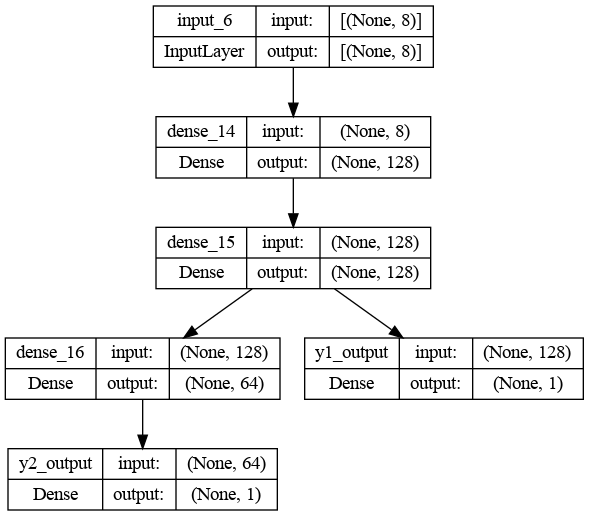

In [33]:
input_layer = Input(shape=len(train.columns))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

y1_output = Dense(1, name='y1_output')(second_dense)
third_dense = Dense(64, activation='relu')(second_dense)

y2_output = Dense(1, name='y2_output')(third_dense)

model = Model(inputs=input_layer, outputs=[y1_output, y2_output])
print(model.summary())

tf.keras.utils.plot_model(model, show_shapes=True)


In [29]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [30]:
history = model.fit(norm_train_X, 
                    train_Y, 
                    epochs=500, 
                    batch_size=10, 
                    validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 5ms/step - loss: 1205.9020 - y1_output_loss: 555.7858 - y2_output_loss: 650.1163 - y1_output_root_mean_squared_error: 23.5751 - y2_output_root_mean_squared_error: 25.4974 - val_loss: 936.7774 - val_y1_output_loss: 444.4594 - val_y2_output_loss: 492.3180 - val_y1_output_root_mean_squared_error: 21.0822 - val_y2_output_root_mean_squared_error: 22.1882
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 503.5674 - y1_output_loss: 289.7415 - y2_output_loss: 213.8258 - y1_output_root_mean_squared_error: 17.0218 - y2_output_root_mean_squared_error: 14.6228 - val_loss: 149.3270 - val_y1_output_loss: 109.7161 - val_y2_output_loss: 39.6109 - val_y1_output_root_mean_squared_error: 10.4745 - val_y2_output_root_mean_squared_error: 6.2937
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 92.3515 - y1_output_loss: 56.2468 - y2_output_loss: 36.1046 - y1_output_root_mean_squared_error: 7.4998 - y2_outpu

In [31]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 2ms/step - loss: 4.4219 - y1_output_loss: 1.8583 - y2_output_loss: 2.5636 - y1_output_root_mean_squared_error: 1.3632 - y2_output_root_mean_squared_error: 1.6011
Loss = 4.421935081481934, Y1_loss = 1.858302116394043, Y1_mse = 1.363195538520813, Y2_loss = 2.5636332035064697, Y2_mse = 1.601135015487671


5/5 [==============================] - 0s 2ms/step


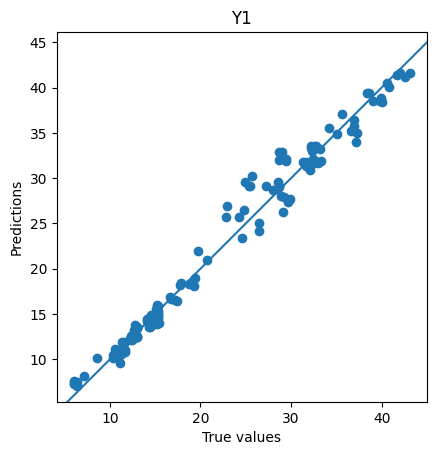

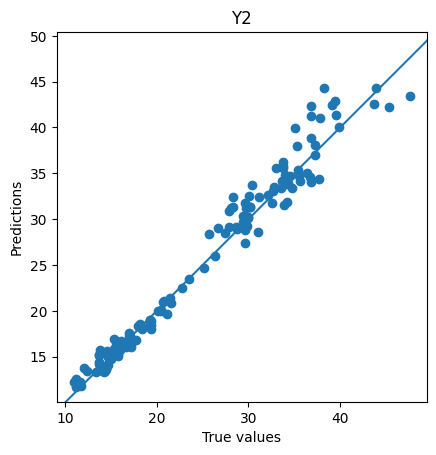

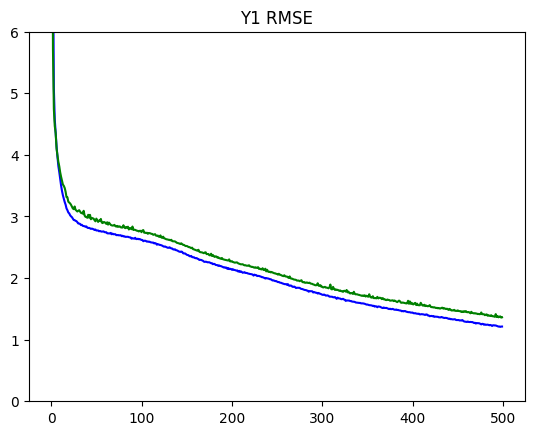

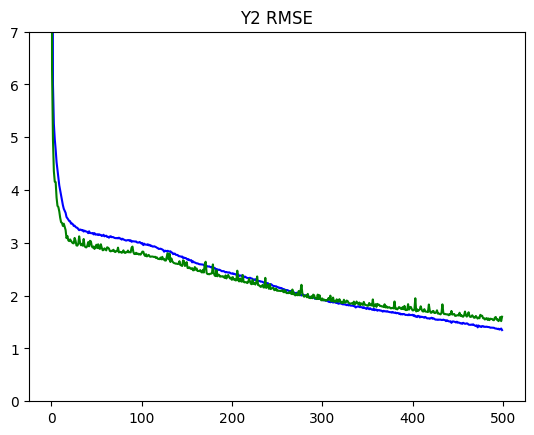

In [32]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)